In [1]:
import h5py as h5  
import pandas as pd
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In this notebook I am going to investigate COWDs and see how much mass they accrete and other properties

In [12]:
# let's first begin by importing the COMPAS run

pathToSM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)
# now looking at the roche lobe overflow (mass transfer)
RLOF_LM = Data_2['BSE_RLOF']

#reading in the data as a table to make it more readable
OG_RLOF_TABLE = Table(RLOF_LM)
# OG_RLOF_TABLE

In [19]:
# let's select this table so that it specifically only displays information for when star 1 is acrreting mass and is a COWD
CO_ACCRET_BOOL = np.logical_and(OG_RLOF_TABLE['Stellar_Type(1)<MT']==11,OG_RLOF_TABLE['RLOF(2)>MT']==1)
CO_RLOF_TABLE = OG_RLOF_TABLE[CO_ACCRET_BOOL]
CO_RLOF_TABLE

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.1819242725908363e-17,0,0.0,0.0,2.6185956682334043e-06,24.730467530210284,2,0.8876201687585465,0.8876201687585465,1.0352744909484257,0.36791807948869976,234.6607700731949,0,0.0001475633987143172,0,0,0,1,0.009317026996987382,0.009317026996987382,0.0003952370292026298,0.00011775251948243853,25.453400266981195,0.01658916128848528,1.0064549985523445,0.0003130762607455443,1,900016,64.46453340000616,173.24944396103658,11,11,3,10,2407.9971680922476,100039.9358114858,5102.595978822963,5102.9121375683335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.7317636588519773e-22,1,0.0,0.0,0.029220508404768922,95.60199767376072,2,0.9810455335118108,0.9810455335118108,5.800472007054785,1.0956426489411404,79357.74419944645,0,0.0289321153912559,0,0,0,1,0.008271267405677104,0.008271267405677104,3.433517989644132e-05,0.00013747216669400243,539.2853032408074,0.00696127452621558,1.0052844196483148,0.00011000435778395138,1,900023,1002.6049843762789,162.87877191205507,11,11,6,11,26267.17991151445,216545.86681333347,117.94047387406353,117.94547387406352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.4244429343270145e-18,1,0.0,0.0,0.0011993069039261718,2145.606018988237,3,1.3090592487671473,1.3090592487671473,4.753591402866659,1.522356906777668,1852.8157058611882,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101456585457414,0.00010720299377173505,0.01011518465169014,68.69051975853246,0.29063898705044344,1.0004643690832113,0.6690190461378616,1,900025,139.28899788780603,1.1080725449094813,11,11,4,7,16789.627526126988,72943.75171203354,112.91955037926353,112.94285970099152,0.0,-0.1499270958837559,0.0,0.0,0.0,-0.3333333333333333,0.0,0.0
2.285110280997332e-07,0,0.0,0.0,0.0011870859412051024,8.233740216874244,4,1.3090592487671473,1.309059426184703,1.5222238796635028,0.7458169063901713,36.89892912579361,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101453666147036,0.010114502790788201,0.0049369474919023874,0.4375174597471506,0.010943885842979395,1.0070894764714173,0.017028048993157456,1,900025,1.1081246076670577,1.939285053666813,11,11,8,11,16746.697401197544,93560.18039442302,113.53429090073953,113.54661402508454,0.0,0.0,1.8500715488110213,0.0,0.0,0.0,4918939.146835906,0.0
3.369212082872473e-18,1,0.0,0.0,0.0002823351129253903,20.061136733557337,2,0.6358379603947141,0.6358379603947141,3.2839904771206805,0.5134091771016284,198.73098796734226,0,0.00038367378658737614,0,0,0,1,0.012303908603959201,0.012303908603959201,0.0007428578924870015,0.02836448208132415,34.8543575876464,0.11374143405696603,1.0028597512706974,0.2891220648817871,1,900043,66.38506367830335,1.0910858465378503,11,11,3,7,6752.229772726407,36258.26946423078,316.18723619237,316.204968770668,0.0,-0.1787915269495764,0.0,0.0,0.0,-0.3333333333333333,0.0,0.0
2.819658610632973e-20,1,0.0,0.0,0.12470176060600591,21040.873679990702,3,1.2414660266666018,1.2414660266666018,11.993091107403485,2.8054160892355835,11509.128968154871,1,0.007631006206347419,0,0,0,1,0.005118763762186627,0.005118763762186627,7.654498122797232e-05,0.10133318894050

In [20]:
# let's save this data as a txt file 
CO_RLOF_TABLE = CO_RLOF_TABLE['CEE>MT','SEED','Mass(1)<MT', 'Mass(1)>MT', 'Mass(2)<MT', 'Mass(2)>MT','Metallicity@ZAMS(1)']
# np.savetxt('COWD_ACCRET_RLOF.txt',CO_RLOF_TABLE, delimiter=',')

Text(0, 0.5, 'Final Mass (Solar Masses)')

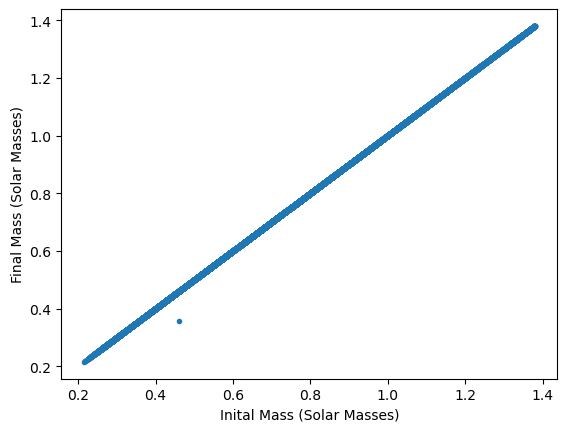

In [4]:
I_MASS_CO = CO_RLOF_TABLE['Mass(1)<MT']
F_MASS_CO = CO_RLOF_TABLE['Mass(1)>MT']

plt.plot(I_MASS_CO,F_MASS_CO,'.')
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")

In [5]:
# it seems like the mass of most of these systems changes by a negligible amount when they are accreting 
np.where(I_MASS_CO-F_MASS_CO>0.1) # there is only one system that has a mass change greater than 0.1 solar masses

(array([28475]),)

Text(0, 0.5, 'Final Stellar Type')

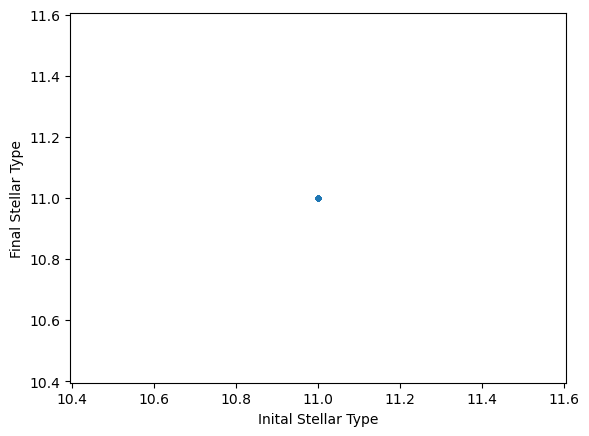

In [15]:
# let's see if all of these COWDs remain as COWDs since they don't really change mass
ST_I = CO_RLOF_TABLE['Stellar_Type(1)<MT']
ST_F = CO_RLOF_TABLE['Stellar_Type(1)>MT']

plt.plot(ST_I, ST_F, '.')
plt.xlabel("Inital Stellar Type")
plt.ylabel("Final Stellar Type") # they all remain as COWDs??

In [8]:
# let's also get information form the system paramters of these sytems that have COWDs as the accretors
list_of_seeds = CO_RLOF_TABLE['SEED']

#let's read in the system parameters as a table
SP_LM = Data_2['BSE_System_Parameters']

#reading in the data as a table to make it more readable
OG_SP_TABLE = Table(SP_LM)
OG_SP_TABLE

# list_of_seeds
# look at np.1D make sure you put the right array in the right place 
# include information about ZAMS and stable or unstable MT

Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
float64,float64,float64,uint32,uint8,uint8,float64,float64,float64,uint8,int32,int32,uint8,float64,float64,float64,uint8,uint8,float64,float64,float64,float64,uint8,uint32,uint64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float64,uint8,float64
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.3283996720870594,0.882687638005253,0,0,0.004487611028747218,0.004487611028747218,0.0,0.0,0,1,900000,0.15434140246361494,0.6934823617339134,0.9712299888846055,2.679065643666147,0.11192382115068078,-0.5314182751065577,1.8281702064900605,0.7412667101509953,35.49559865522572,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,2.0220250434469254,1.0641540412223531,0,0,0.027780354231953172,0.027780354231953172,0.0,0.0,0,1,900001,0.954801702639088,0.9425433448050171,1.0592930417499484,0.35840551407969595,0.5418321412099627,0.9888221570384301,5.028768911793038,5.274911818713106,120.15440915191046,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.5364484453391714,1.3980966760608509,0,0,0.008524552565213667,0.008524552565213667,0.0,0.0,0,1,900002,0.34548651380464435,0.44101438904181123,5.374212766881896,4.612627732356849,0.6561688107859962,0.00746289396866695,5.958445170529418,6.225057117495736,160.40270782507386,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,0.9717694707932819,0.5659603850097936,0,0,0.0016000636446804315,0.0016000636446804315,0.0,0.0,0,1,900003,0.8808047617785633,0.10477456450462341,5.662423362181468,2.4855261387689187,-1.0230355918120357,0.1266613952749478,2.10473105115933,1.0570043663945763,1.211484039071418,265.0,265.0,30.0,30.0,10,0,1,0,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,2.5254897709965802,1.456961299924082,0,0,0.010712012980824344,0.010712012980824344,0.0,0.0,0,1,900004,0.1734036598354578,0.423496212111786,0.05671341916440766,4.415918357547529,0.7297735810978665,-0.9688259680180739,4.465642524667249,1.1905690342648234,132.45623878061986,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,0.9738995826139937,0.14963324181027216,0,0,0.00044778451022546594,0.00044778451022546594,0.0,0.0,0,1,900005,0.9765084215905517,0.025380379520356655,3.333822176789597,5.517736995664975,1.1228226072182115,1.0908126828790876,3.50319685853066,0.6529127048234574,1.7697833975543937,265.0,265.0,30.0,30.0,11,0,1,0,0.0,0,1.0
0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.0373156293817731,0.9509881166584517,0,0,0.0011569074621764295,0.0011569074621764295,0.0,0.0,0,1,900006,0.3155034191440791,0.030249588657170534,0.6298627349625494,3.296793737949348,0.4617475484337721,0.7536161948591049,4.479074514746408,0.867002475367451,6.903570653683481,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
636.2097881568486,0.0,1.0,0,0,0,636.2097881568486,0.0,0.0,0,0,3,0,1.5,15.995827895126453,2.7398653670700126,0,0,0.028168370455850612,0.028168370455850612,0.0,0.0,0,1,900007,0.876315290806815,0.8813622565940022,6.1156426743221415,4.733061879528203,0.9557256598658075,1.448822891115332,2.4391413293982813,4.083584899256465,29.044392811103094,265.0,265.0,30.0,30.0,13,11,1,1,510.86821952735454,1,1.0
0.0,0

In [9]:
# let's now only select the seeds in this table that overlap with RLOF table
overlap_seed_bool = np.in1d(OG_SP_TABLE['SEED'],list_of_seeds,assume_unique=True)

In [11]:
# let's now take these indicies and slcie the system paramters table
OG_SP_TABLE_CO = OG_SP_TABLE[overlap_seed_bool]
OG_SP_TABLE_CO 

Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
float64,float64,float64,uint32,uint8,uint8,float64,float64,float64,uint8,int32,int32,uint8,float64,float64,float64,uint8,uint8,float64,float64,float64,float64,uint8,uint32,uint64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float64,uint8,float64
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,3.046886958066549,1.058485400924328,0,0,0.0001475633987143172,0.0001475633987143172,0.0,0.0,0,1,900016,0.25943256658501923,0.05022339429706335,4.422581643648712,0.48184808206099633,0.21431154859547585,0.898516544802352,3.7787177118115425,0.7378806955556106,2.2881138302431556,265.0,265.0,30.0,30.0,11,10,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,6.000725071378696,4.646733492235781,0,0,0.0289321153912559,0.0289321153912559,0.0,0.0,0,1,900023,0.05529985413886607,0.5325686130672693,4.976095055635501,2.4775932753047423,0.039066018289858784,-1.2271143977007564,0.31972310883653576,5.055325009138229,0.6324415438028811,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,9.744556581684963,4.426358048520309,0,0,0.0001647393829398977,0.0001647393829398977,0.0,0.0,0,1,900025,0.9749753209762275,0.8237918061204255,4.424817393553813,4.173936707937674,-0.12161605883519688,0.3766259739382465,6.252799950078928,2.6217040859613103,0.1941598802427646,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,4.014520438197608,2.3790993863941168,0,0,0.00038367378658737614,0.00038367378658737614,0.0,0.0,0,1,900043,0.2766116161365062,0.723182873101905,4.725532095345326,4.477502739469944,0.15415998886848592,0.8385277896442922,5.047334395519955,0.9251030890455068,0.053351118195444,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,12,1,1.5,9.668863189357838,6.860201565414544,1,0,0.007631006206347419,0.007631006206347419,0.0,0.0,1,1,900052,0.21740023605525494,0.2562757325358689,2.815335334840044,5.507338202376351,-1.2787972080777896,0.2975933823153043,0.6975673575546975,5.635039930534483,0.1258399626027227,265.0,265.0,30.0,30.0,11,2,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,3.9749568502662647,2.7820558056737097,0,0,0.0027729824196237756,0.0027729824196237756,0.0,0.0,0,1,900055,0.13412445248104632,0.10138390841893852,3.056739582387357,5.225216599816338,0.49135046360225143,1.2416743023107024,0.9225083785425423,0.15525298430425283,0.44822580489913677,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,3.421034210602963,2.568023686320185,0,0,0.0015940889246266476,0.0015940889246266476,0.0,0.0,0,1,900056,0.27708517271094024,0.7188211891334504,3.1963606477194393,4.516212872862379,-0.7664790028750367,-0.6215384230491143,3.3575791339965084,2.168454718168699,0.27976169417754554,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0,0,3,0,1.5,3.3850498918131446,1.7988190040047003,0,0,0.01704139034150715,0.01704139034150715,0.0,0.0,0,1,900058,0.9338152401614934,0.017310884315520525,2.930735014751344,4.106163872401326,-1.076257745855456,0.6115254543765354,1.7004058391056103,3.956215945462578,5.408078130877368,265.0,265.0,30.0,30.0,11,11,1,1,0.0,0,1.0
0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,3

In [21]:
# let's save this data as a txt file 
OG_SP_TABLE_CO = OG_SP_TABLE_CO['SEED','Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)','SemiMajorAxis@ZAMS']
# np.savetxt('COWD_ACCRET_SP.txt',OG_SP_TABLE_CO, delimiter=',')